<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/L2_Metrics_for_UQ_and_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to decision-making under uncertainty (with Python)**

*  Understand uncertainty
*  Modellings approaches
*  Metrics for uncertainty quantification and decision-making





### **Uncertainty sources:**

**Aleatoric uncertainty**: Intrinsic variability, randomness, stochasticity.  
**Epistemic uncertainty**: Lack of data, missing information, model-form uncertainty, imprecision, conflicting evidence, ambiguities




### **Interpretation and modelling approaches:**


**Aleatoric uncertainty**: Irreducible (Natural variability, more data and information can improve the characterization but do not help reducing it.)

- Chance / probability of occurance

1.   Uni-variate: parametric,non-param PDF, CDF, conditional;
2.   Multi-variate: joint PDF, CDF, correlation, depenency
3.   Application to Sochastic programming  

⏩ Probability theory....
Example: $\mathbb{P}(x)$, $ \forall x ∈ X$  


**Epistemic uncertainty**: Reducible (more data, higher-quality data, better models, more knowledgable experts)

- Reasoning on quality of available information

1.   Define the domain of uncertain factors and models
2.   Stochsticity may not be involved, e.g., constant but imprecise material properties
3.   Besides data, physics, prior expert knowledge may help reducing it too
4.   Applies in naturally to robust optimization

⏩ Set theory
Example: define an uncertainty set $x ∈ X$



**Epistemic + Aletory uncertainty**:
Probability models interpretation:

- Reasoning about the uncertainty affecting chances and probabilities

1.   Most of existing real-life problems
2.   Set of parametric distribution,e.g., imprecise mean and variance;
3.   Set of non-parametric distribution, e.g., set of plausible CDFs/PDFs;  


⏩ Statistical reasoning and information theory, Bayesian inference, Evidence theory, Fuzzy set theory, Imprecise probability theory, Belief models, Hyerarchical Bayesian Models.....evolving literature...


Example-1, imprecise prametric: $\mathbb{P}(x) \in \{ \mathbb{P}(x; \theta): \theta ∈ \Theta \} $  

Example-2, imprecise non-parametric: $\mathbb{P}(x) \in [\underline{\mathbb{P}}(x), \overline{\mathbb{P}}(x)]   $  

Example-3, multiple probability assignments : $\mathbb{P}(x) \in \{\mathbb{P}_1(x), x ∈ X_1, \mathbb{P}_2(x), x ∈ X_2 \}$  




**Target Distribution:**



*   $𝑓(𝑥)$, the true (or reference) probability density function.
*   $F(𝑥) = \int\limits_{-∞}^{+∞} f(x) dx$, the corresponding probability distribution function.

**Proposal Distribution:**
, the approximating or proposed probability density function.

*   $\hat{f}(𝑥)$, the proposed, e.g., modelled, probability density function.
*   $\hat{f}(𝑥) = \int\limits_{-∞}^{+∞} \hat{f}(𝑥) dx$, the corresponding probability distribution function.


In [21]:
import sys
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from scipy.stats import entropy  # For KL divergence
from scipy.special import kl_div
import math

from scipy.spatial.distance import directed_hausdorff  # For Hausdorff distance
from scipy.integrate import quad  # For Wasserstein distance


***Metrics for robust optimization:***

*Uncertainty sets:*


The **Hausdorff distance** distance quantifies how far two subsets A and B of a metric space are from each other. It considers the maximum of the shortest distances from any point in one set to the other set.

$d_H(A, B) = \max\left(\sup\limits_{a \in A} \inf\limits_{b \in B} d(a,b), \sup\limits_{b \in B} \inf\limits_{a \in A} d(a,b)\right)$

The **Jaccard distance** measures the dissimilarity between two sets by calculating the complement of their intersection over their union.
$d_J(A, B) = 1 - \frac{|A \cap B|}{|A \cup B|}$

The **Chambolle's distance** a measure of the distance between the boundaries of two sets $∂𝐴$ and $∂𝐵$

$d_{\partial}(A, B) = \int_{\partial A} \inf_{x \in \partial B} \|a - x\| \, da$





Chebyshev Distance

In [23]:
 # Hausdorff Distance
def hausdorff_distance(set_a, set_b):
    return max(directed_hausdorff(set_a, set_b)[0], directed_hausdorff(set_b, set_a)[0])

 # Jaccard Distance
def jaccard_distance(set_a, set_b):
    intersection = len(set_a.intersection(set_b))
    union = len(set_a.union(set_b))
    return 1 - intersection / union


# Fréchet Distance (simplified implementation)
def frechet_distance(curve_a, curve_b):
    n, m = len(curve_a), len(curve_b)
    ca = np.full((n, m), -1.0)

    def compute(ca, i, j):
        if ca[i, j] > -1:
            return ca[i, j]
        if i == 0 and j == 0:
            ca[i, j] = np.linalg.norm(curve_a[0] - curve_b[0])
        elif i > 0 and j == 0:
            ca[i, j] = max(compute(ca, i - 1, 0), np.linalg.norm(curve_a[i] - curve_b[0]))
        elif i == 0 and j > 0:
            ca[i, j] = max(compute(ca, 0, j - 1), np.linalg.norm(curve_a[0] - curve_b[j]))
        else:
            ca[i, j] = max(
                min(compute(ca, i - 1, j), compute(ca, i - 1, j - 1), compute(ca, i, j - 1)),
                np.linalg.norm(curve_a[i] - curve_b[j]),
            )
        return ca[i, j]

    return compute(ca, n - 1, m - 1)


# Metrics for stochastic optimization:

*PDF/CDF:*

$f(x) = \frac{d}{dx} F(x)$

$F(x) = \int_{-\infty}^x f(t) \, dt$

Mean:  

$\mu = \mathbb{E}[X] = \int_{-\infty}^\infty x f(x) \, dx$

Variance:

$\mathbb{E}[(X-\mu)^2] = \int_{-\infty}^\infty (x-\mu)^2 f(x) \, dx$

Skewness:  

$ S = \int_{-\infty}^\infty x f(x) \, dx$

Kurtosis:

$K = \int_{-\infty}^\infty x^2 f(x) \, dx$


N-th raw moment:

$\mu_n = \mathbb{E}[X^n] = \int_{-\infty}^\infty (x-c)^n f(x) \, dx$

- Value-at-risk and percentile

$\text{VaR}_{\alpha} = F^{-1}(\alpha) = \inf \{ x : F(x) \geq \alpha \}$


- Tails expectations, Conditional Value-at-Risk

$\text{CVaR}_{\alpha} = \mathbb{E}[X \, | \, X \geq \text{VaR}_{\alpha}]$


In [54]:
# Define 1D Gaussian density function
from scipy.stats import norm

class Gaussian:
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma

  def pdf(self, x):
      return (1 / (self.sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self.mu) / self.sigma) ** 2)

  def cdf(self, x):
      return 0.5 * (1 + math.erf((x - self.mu) / (self.sigma * np.sqrt(2))))

  def icdf(self, alpha):
      return norm.ppf(alpha, loc=self.mu, scale=self.sigma)

  def value_at_risk(self, alpha):
        """Value-at-risk at level alpha = inverse_cdf(alpha)"""
        return self.icdf(alpha)  # VaR is the inverse CDF at level alpha

  def conditional_value_at_risk(self, alpha):
      # Calculate the Value-at-Risk at level alpha
      # closed form expression (Gaussian = mu + sigma/(1-alpha)*pdf(icdf(alpha)))
      pdf_at_var = norm.pdf(self.value_at_risk(alpha))
      cvar_alpha = self.mu + (pdf_at_var / (1 - alpha)) * self.sigma
      return cvar_alpha

  def sample(self, n_samples):
      # sample uniformly alpha in [0,1] -> inverse CDF
      alpha_vals = np.random.uniform(0, 1, n_samples)
      return self.icdf(alpha_vals)



# *Distance and divergence:*   (Target and Proposal)






- Kolmogorov-Smirnov (KS) distance

$d_{KS}(F, \hat{F}) = \sup_x |F(x) - \hat{F}(x)|$


In [ ]:
# Kolmogorov-Smirnov Distance
def kolmogorov_smirnov_distance(cdf_f, cdf_f_hat):
    return np.max(np.abs(cdf_f - cdf_f_hat))



- Kullback-Leibler

$D_{KL}(f \| \hat{f}) = \int f(x) \log \frac{f(x)}{\hat{f}(x)} \, dx$



In [ ]:

# Kullback-Leibler Divergence
def kl_divergence(p, q, x):
    return entropy(p(x), q(x))





- Bhattacharyya Distance

$D_B(f, \hat{f}) = -\log \int \sqrt{f(x) \hat{f}(x)} \, dx$



In [ ]:

# Battacharya Distance (Affinity)
def battacharya_distance(f, f_hat, x):
    term1 = np.sum(np.sqrt(f(x) * f_hat(x)))
    return -np.log(term1)



- Wasserstein distance (also known as Kantorovich-Rubinstein distance)

Be $\mu ,\nu \in \mathbb{P}(\mathbb{R})$ probability measures
  
${\displaystyle Cost =\inf _{\gamma \in \Gamma (\mu ,\nu )}\int c(x,y)\,\mathrm {d} \gamma (x,y).}$

1-Dimensional distribution


$p$-Wasserstei:  ${\displaystyle W_{p}(\mu _{1},\mu _{2})=\left(\int _{0}^{1}\left|F_{1}^{-1}(q)-F_{2}^{-1}(q)\right|^{p}\,\mathrm {d} q\right)^{1/p},}$


$1$-Wasserstei:
${\displaystyle W_{1}(\mu _{1},\mu _{2})=\int _{\mathbb {R} }\left|F(x)-\hat{F}(x)\right|\,\mathrm {d} x.}$

Example two gaussian

$\displaystyle W_{2}(\mu _{1},\mu _{2})^{2}=\|m_{1}-m_{2}\|_{2}^{2}+\mathop {\mathrm {trace} } {\bigl (}C_{1}+C_{2}-2{\bigl (}C_{2}^{1/2}C_{1}C_{2}^{1/2}{\bigr )}^{1/2}{\bigr )}$


In [30]:
# Wasserstein Distance (1D)
def wasserstein_distance(p, q, x):
    cdf_p = np.cumsum(p(x)) / np.sum(p(x))
    cdf_q = np.cumsum(q(x)) / np.sum(q(x))
    return np.sum(np.abs(cdf_p - cdf_q) * (x[1] - x[0]))







- Jensen-Shannon (JS) divergence

$D_{JS}(f \| \hat{f}) = \frac{1}{2} D_{KL}\left(f \| m\right) + \frac{1}{2} D_{KL}\left(\hat{f} \| m\right)$

In [ ]:

# Shannon Entropy
def shannon_entropy(f, x):
    return -np.sum(f(x) * np.log(f(x) + np.finfo(float).eps))  # Prevent log(0)

# Total Variation Distance
def total_variation(p, q, x):
    return 0.5 * np.sum(np.abs(p(x) - q(x)))



Visualizing Divergences for Distributions...


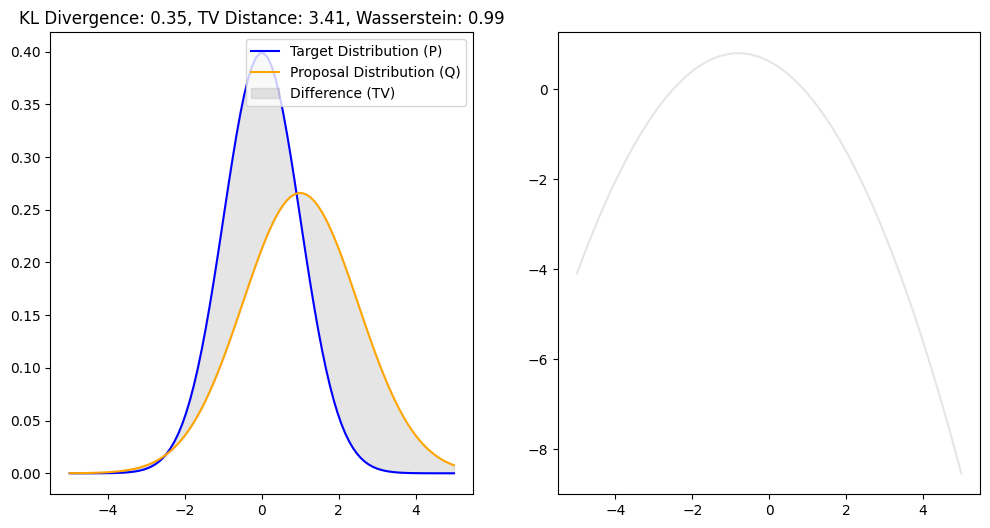

In [30]:
def visualize_distributions():
    x = np.linspace(-5, 5, 100)
    p = lambda x: gaussian(x, 0, 1)
    q = lambda x: gaussian(x, 1, 1.5)

    fig, ax = plt.subplots(1,2,figsize=(12, 6))

    # Plot the two distributions
    ax[0].plot(x, p(x), label="Target Distribution (P)", color="blue")
    ax[0].plot(x, q(x), label="Proposal Distribution (Q)", color="orange")

    # Compute metrics
    kl = kl_divergence(p, q, x)
    tv = total_variation(p, q, x)
    ws = wasserstein_distance(p, q, x)

    # Annotate results
    ax[0].set_title(f"KL Divergence: {kl:.2f}, TV Distance: {tv:.2f}, Wasserstein: {ws:.2f}")
    ax[0].fill_between(x, p(x), q(x), color="gray", alpha=0.2, label="Difference (TV)")
    ax[0].legend()

    ax[1].plot(x, np.log(p(x)/q(x)), color="gray", alpha=0.2, label="log probability ration log(P/Q)")



    plt.show()

print("Visualizing Divergences for Distributions...")
visualize_distributions()


In [25]:
def visualize_sets():
    set_a = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
    set_b = np.array([[0, 0], [1, 2], [2, 3], [3, 5]])

    # Compute distances
    hausdorff = hausdorff_distance(set_a, set_b)
    frechet = frechet_distance(set_a, set_b)

    # Plot the sets
    plt.figure(figsize=(12, 6))
    plt.plot(set_a[:, 0], set_a[:, 1], "-o", label="Set A (Curve)", color="blue")
    plt.plot(set_b[:, 0], set_b[:, 1], "-o", label="Set B (Curve)", color="orange")

    # Annotate results
    plt.title(f"Hausdorff Distance: {hausdorff:.2f}, Fréchet Distance: {frechet:.2f}")
    plt.legend()
    plt.show()


Visualizing Divergences for Distributions...


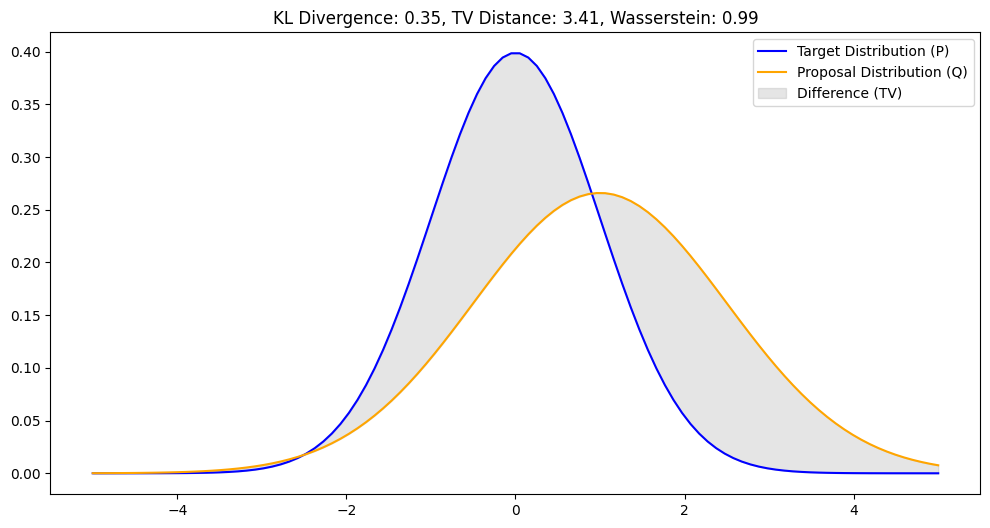

Visualizing Distances for Sets...


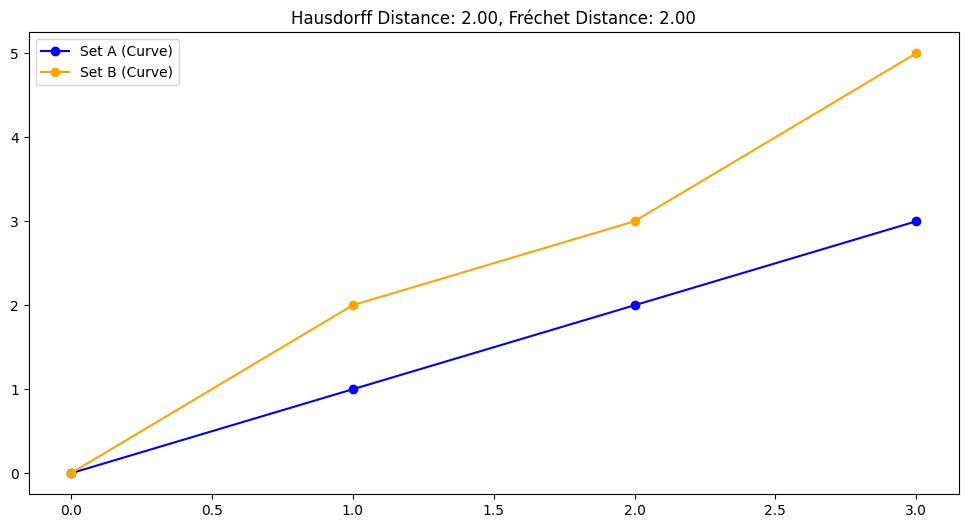

In [ ]:

print("Visualizing Distances for Sets...")
visualize_sets()

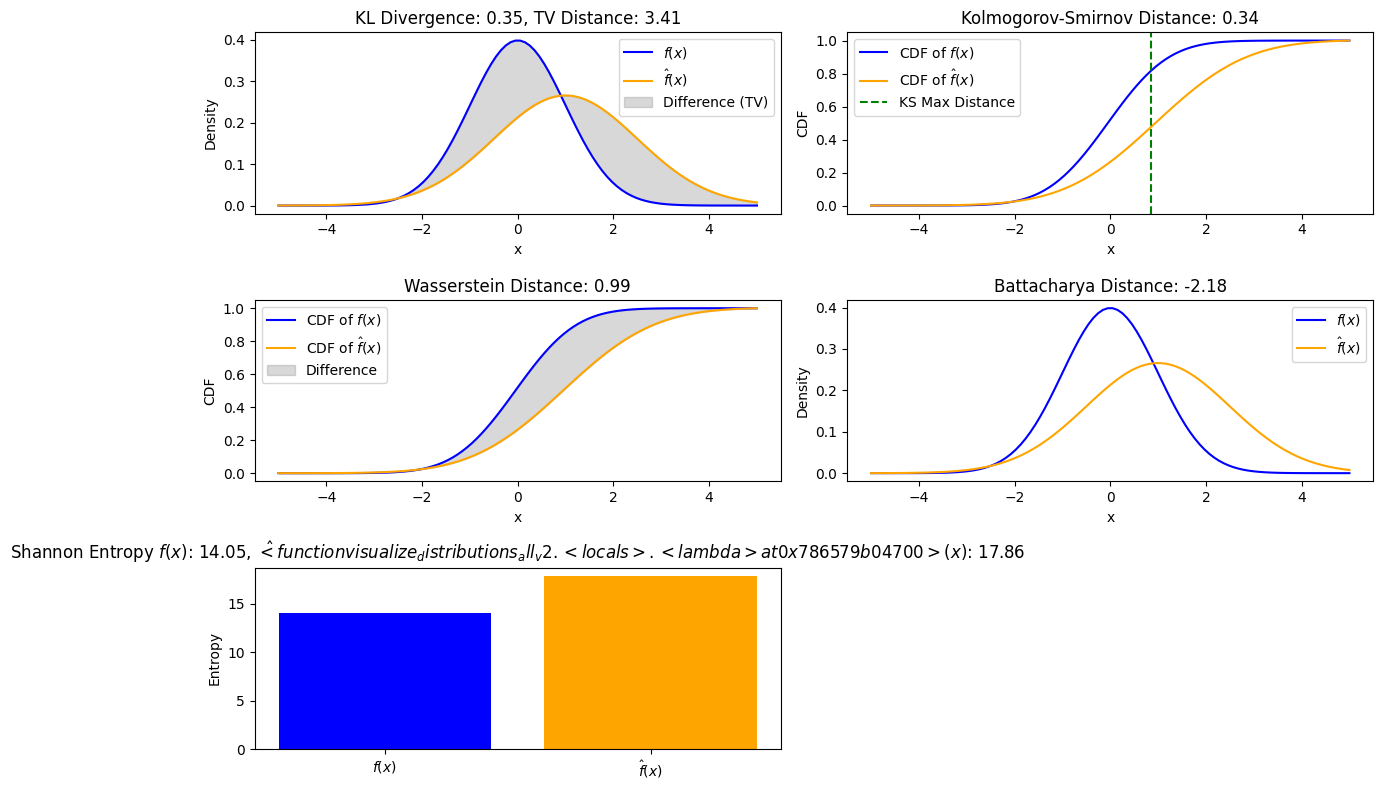

In [ ]:


# Updated function to visualize all metrics
def visualize_distributions_all_v2():
    # Define two Gaussian distributions
    x = np.linspace(-5, 5, 100)
    f = lambda x: gaussian(x, 0, 1)  # Target distribution
    f_hat = lambda x: gaussian(x, 1, 1.5)  # Proposal distribution

    # Compute metrics
    kl_divergence = entropy(f(x), f_hat(x))  # KL divergence
    tv_distance = 0.5 * np.sum(np.abs(f(x) - f_hat(x)))  # Total Variation distance
    cdf_f = np.cumsum(f(x)) / np.sum(f(x))  # CDF of f
    cdf_f_hat = np.cumsum(f_hat(x)) / np.sum(f_hat(x))  # CDF of f_hat
    wasserstein_distance = np.sum(np.abs(cdf_f - cdf_f_hat) * (x[1] - x[0]))  # Wasserstein distance
    battacharya = battacharya_distance(f, f_hat, x)  # Battacharya distance
    shannon_f = shannon_entropy(f, x)  # Shannon entropy for f
    shannon_f_hat = shannon_entropy(f_hat, x)  # Shannon entropy for f_hat
    ks_distance = kolmogorov_smirnov_distance(cdf_f, cdf_f_hat)  # Kolmogorov-Smirnov distance

    # Plot the distributions and the metrics
    plt.figure(figsize=(12, 8))

    # Plot Target and Proposal distributions
    plt.subplot(3, 2, 1)
    plt.plot(x, f(x), label=r"$f(x)$", color="blue")
    plt.plot(x, f_hat(x), label=r"$\hat{f}(x)$", color="orange")
    plt.fill_between(x, f(x), f_hat(x), color="gray", alpha=0.3, label="Difference (TV)")
    plt.title(f"KL Divergence: {kl_divergence:.2f}, TV Distance: {tv_distance:.2f}")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()

    # Plot CDFs of f and f_hat
    plt.subplot(3, 2, 2)
    plt.plot(x, cdf_f, label="CDF of $f(x)$", color="blue")
    plt.plot(x, cdf_f_hat, label="CDF of $\hat{f}(x)$", color="orange")
    plt.title(f"Kolmogorov-Smirnov Distance: {ks_distance:.2f}")
    plt.axvline(x=x[np.argmax(np.abs(cdf_f - cdf_f_hat))], color="green", linestyle="--", label="KS Max Distance")
    plt.xlabel("x")
    plt.ylabel("CDF")
    plt.legend()

    # Plot Wasserstein Distance (CDF comparison)
    plt.subplot(3, 2, 3)
    plt.plot(x, cdf_f, label="CDF of $f(x)$", color="blue")
    plt.plot(x, cdf_f_hat, label="CDF of $\hat{f}(x)$", color="orange")
    plt.fill_between(x, cdf_f, cdf_f_hat, color="gray", alpha=0.3, label="Difference")
    plt.title(f"Wasserstein Distance: {wasserstein_distance:.2f}")
    plt.xlabel("x")
    plt.ylabel("CDF")
    plt.legend()

    # Plot Battacharya Distance
    plt.subplot(3, 2, 4)
    plt.plot(x, f(x), label=r"$f(x)$", color="blue")
    plt.plot(x, f_hat(x), label=r"$\hat{f}(x)$", color="orange")
    plt.title(f"Battacharya Distance: {battacharya:.2f}")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()

    # Plot Shannon Entropy
    plt.subplot(3, 2, 5)
    plt.bar(["$f(x)$", "$\hat{f}(x)$"], [shannon_f, shannon_f_hat], color=["blue", "orange"])
    plt.title(f"Shannon Entropy $f(x)$: {shannon_f:.2f}, $\hat{f}(x)$: {shannon_f_hat:.2f}")
    plt.ylabel("Entropy")

    plt.tight_layout()
    plt.show()

# Run the updated visualization function
visualize_distributions_all_v2()

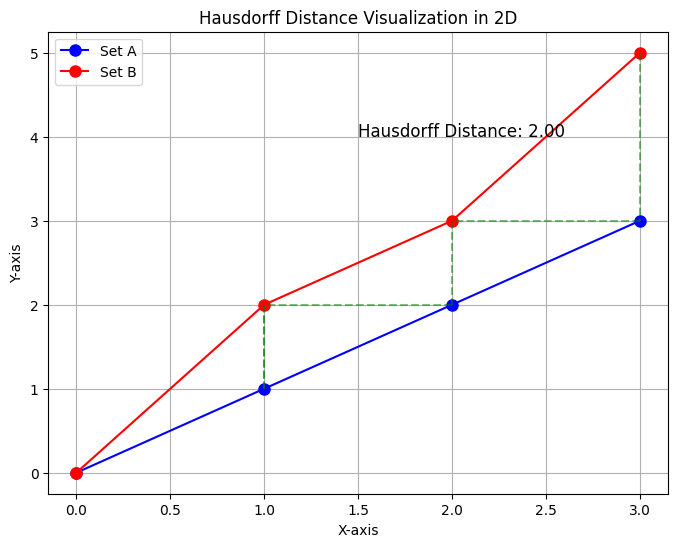

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import directed_hausdorff

# Define two 2D sets (curves or point sets)
set_a = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])  # Set A
set_b = np.array([[0, 0], [1, 2], [2, 3], [3, 5]])  # Set B

# Hausdorff distance calculation
hausdorff_distance = max(directed_hausdorff(set_a, set_b)[0], directed_hausdorff(set_b, set_a)[0])

# Plot the sets
plt.figure(figsize=(8, 6))

# Plot Set A and Set B
plt.plot(set_a[:, 0], set_a[:, 1], 'bo-', label="Set A", markersize=8)
plt.plot(set_b[:, 0], set_b[:, 1], 'ro-', label="Set B", markersize=8)

# Mark the Hausdorff distance
for i in range(len(set_a)):
    closest_b = np.argmin(np.linalg.norm(set_b - set_a[i], axis=1))
    plt.plot([set_a[i, 0], set_b[closest_b, 0]], [set_a[i, 1], set_b[closest_b, 1]], 'g--', alpha=0.5)

for i in range(len(set_b)):
    closest_a = np.argmin(np.linalg.norm(set_a - set_b[i], axis=1))
    plt.plot([set_b[i, 0], set_a[closest_a, 0]], [set_b[i, 1], set_a[closest_a, 1]], 'g--', alpha=0.5)

# Annotate the Hausdorff Distance
plt.text(1.5, 4, f"Hausdorff Distance: {hausdorff_distance:.2f}", fontsize=12, color='black')

plt.title("Hausdorff Distance Visualization in 2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


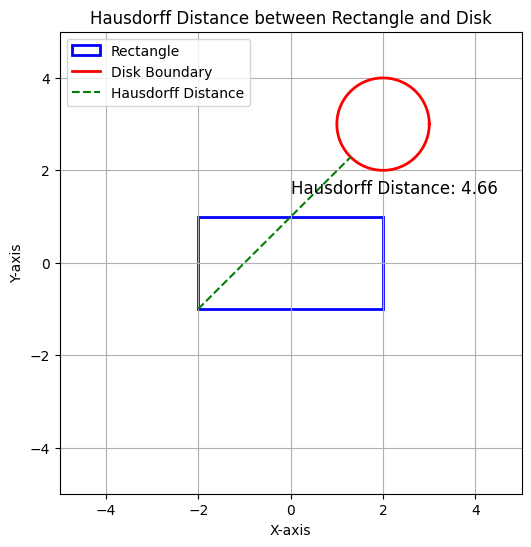

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import directed_hausdorff

# Define a rectangle and a disk
rectangle_corners = np.array([[-2, -1], [2, -1], [2, 1], [-2, 1]])  # A simple rectangle
angle = np.linspace(0, 2 * np.pi, 100)  # Disk angles for the boundary
radius = 1
center = np.array([2, 3])
disk_boundary = np.array([center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle)]).T

# Function to compute Hausdorff Distance between a set of points and a boundary
def hausdorff_distance(set_a, set_b):
    # Directed Hausdorff distance (from set_a to set_b, and vice versa)
    return max(directed_hausdorff(set_a, set_b)[0], directed_hausdorff(set_b, set_a)[0])

# Compute the Hausdorff distance between the rectangle and the disk boundary
hdist = hausdorff_distance(rectangle_corners, disk_boundary)

# Plot the rectangle and disk
plt.figure(figsize=(8, 6))

# Plot rectangle (closed polygon)
rectangle = plt.Polygon(rectangle_corners, closed=True, fill=None, edgecolor='blue', linewidth=2, label='Rectangle')
plt.gca().add_patch(rectangle)

# Plot disk boundary
plt.plot(disk_boundary[:, 0], disk_boundary[:, 1], 'r-', label='Disk Boundary', linewidth=2)

# Mark the Hausdorff distance (Example: Max distance between rectangle and disk boundary)
# Here we just highlight the closest points for simplicity
closest_points_rectangle_to_disk = [rectangle_corners[0], disk_boundary[np.argmin(np.linalg.norm(disk_boundary - rectangle_corners[0], axis=1))]]
plt.plot([closest_points_rectangle_to_disk[0][0], closest_points_rectangle_to_disk[1][0]],
         [closest_points_rectangle_to_disk[0][1], closest_points_rectangle_to_disk[1][1]], 'g--', label='Hausdorff Distance')

# Annotate Hausdorff distance
plt.text(0, 1.5, f"Hausdorff Distance: {hdist:.2f}", fontsize=12, color='black')

# Adjust plot settings
plt.title("Hausdorff Distance between Rectangle and Disk")
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: Metrics for robust optimization:
# Uncertainty sets
# Volume
# Fréchet
# Hausdorff distance
# Metrics for stochastic optimization:
# PDF/CDF:
# Moment, n-th raw moments
# Value-at-risk and percentile
# Tails expectations, Conditional Value-at-Risk
# Distance and divergence (between distributions):
# Kolmogorov-Smirnov
# Kullback–Leibler
# Bhattacharyya
# Wasserstein
# Jensen–Shannon divergence

# Placeholder for future code implementation of metrics calculations.
# This is a stub; replace with actual code to calculate the metrics.


def calculate_volume(uncertainty_set):
  """Calculates the volume of an uncertainty set.

  Args:
    uncertainty_set: The uncertainty set.

  Returns:
     The volume of the uncertainty set.
  """
  # Replace with actual volume calculation logic.
  return 0.0

def calculate_hausdorff_distance(set1, set2):
    """
    Calculates Hausdorff distance between two sets.
    """
    return 0.0

def calculate_frechet_distance(set1,set2):
    """
    Calculates Frechet distance between two sets
    """
    return 0.0

def calculate_nth_moment(data, n):
    """Calculates the n-th raw moment of a dataset."""
    return 0.0


def calculate_value_at_risk(data, alpha):
    """Calculates the Value-at-Risk (VaR) at a given confidence level."""
    return 0.0


def calculate_conditional_value_at_risk(data, alpha):
    """Calculates the Conditional Value-at-Risk (CVaR) at a given confidence level."""
    return 0.0


def calculate_kolmogorov_smirnov_distance(data1, data2):
    """Calculates the Kolmogorov-Smirnov distance between two datasets."""
    return 0.0


def calculate_kullback_leibler_divergence(data1, data2):
    """Calculates the Kullback-Leibler divergence between two datasets."""
    return 0.0


def calculate_bhattacharyya_distance(data1, data2):
    """Calculates the Bhattacharyya distance between two datasets."""
    return 0.0


def calculate_wasserstein_distance(data1, data2):
    """Calculates the Wasserstein distance between two datasets."""
    return 0.0


def calculate_jensen_shannon_divergence(data1, data2):
    """Calculates the Jensen-Shannon divergence between two datasets."""
    return 0.0

# Example usage (replace with your actual data)
uncertainty_set = [[0,0],[1,1]] # replace with real data

# Calculate and print the metrics
volume = calculate_volume(uncertainty_set)
hausdorff = calculate_hausdorff_distance(uncertainty_set, uncertainty_set)
frechet = calculate_frechet_distance(uncertainty_set, uncertainty_set)

print(f"Volume: {volume}")
print(f"Hausdorff Distance: {hausdorff}")
print(f"Frechet Distance: {frechet}")

